In [1]:
import os
import sys

index = sys.path.index('')
sys.path.pop(index)
path = sys.path[0]
parent_dir = os.path.abspath(os.path.join(path, os.pardir))

for root, dirs, files in os.walk(parent_dir):
    for dir in dirs:
        sys.path.append(os.path.join(root,dir))

sys.path.append(parent_dir)
sys.path.pop(0)

'/Users/khatran/Library/CloudStorage/OneDrive-TrườngĐạihọcPhenikaa/Quantum Computing/GitHub/GRAPE/GRAPE-for-qubit/experiments'

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import inspect

from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape

2023-06-16 15:19:58.183100: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/khatran/miniconda3/envs/quantum/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (None) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
qubit_state_num = 2
qubit_num = 1
freq_ge = 5.2353
g_ops = 0.073

ens = np.array([2 * np.pi * ii * (freq_ge) for ii in np.arange(qubit_state_num)])
Q_x = np.diag(np.sqrt(np.arange(1, qubit_state_num)), 1) + np.diag(np.sqrt(np.arange(1, qubit_state_num)), -1)
Q_y = (0 + 1j) * (np.diag(np.sqrt(np.arange(1, qubit_state_num)), 1) - np.diag(np.sqrt(np.arange(1, qubit_state_num)), -1))
Q_z = np.diag(np.arange(0, qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag(ens)

H0 = H_q
print("ens: ", ens)
print("Q_x: \n", Q_x)
print("Q_y: \n", Q_y)
print("Q_z: \n", Q_z)
print("I_q: \n", I_q)
print("H_0: \n", H_q)

ens:  [ 0.         32.89436004]
Q_x: 
 [[0. 1.]
 [1. 0.]]
Q_y: 
 [[ 0.+0.j  0.+1.j]
 [-0.-1.j  0.+0.j]]
Q_z: 
 [[0 0]
 [0 1]]
I_q: 
 [[1. 0.]
 [0. 1.]]
H_0: 
 [[ 0.          0.        ]
 [ 0.         32.89436004]]


In [10]:
U0 = np.identity(len(H0))
print(U0)

[[1. 0.]
 [0. 1.]]


In [11]:
ops_max_amp = [2 * np.pi * g_ops]

In [9]:
print(ops_max_amp)

[0.45867252742410974]


In [12]:
maxAmp = ops_max_amp

In [17]:
g = np.array([1,0])
e = np.array([0,1])
psi0 = [g,e]
print(psi0)

[array([1, 0]), array([0, 1])]


In [18]:
target_vec_0 = np.zeros(qubit_state_num**qubit_num, dtype=complex)
target_vec_0[1] = 1

target_vec_1 = np.zeros(qubit_state_num**qubit_num, dtype=complex)
target_vec_1[0] = 1

U = [target_vec_0,target_vec_1]
print(U)

[array([0.+0.j, 1.+0.j]), array([1.+0.j, 0.+0.j])]


In [19]:
print(c_to_r_mat(U0))

[[ 1.  0. -0. -0.]
 [ 0.  1. -0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [21]:
for target_vector_c in U:
    print(target_vector_c)
    print(c_to_r_vec(target_vector_c))

[0.+0.j 1.+0.j]
[0. 1. 0. 0.]
[1.+0.j 0.+0.j]
[1. 0. 0. 0.]


In [22]:
initial_vectors_c = []
initial_vectors = []
for state in psi0:
    initial_vector_c = np.array(state)
    initial_vectors_c.append(initial_vector_c)
    initial_vector = c_to_r_vec(initial_vector_c)
    initial_vectors.append(initial_vector)

print(initial_vectors_c)

[array([1, 0]), array([0, 1])]


In [23]:
print(initial_vectors)

[array([1, 0, 0, 0]), array([0, 1, 0, 0])]


In [25]:
Hops = [Q_x]
Hops

[array([[0., 1.],
        [1., 0.]])]

In [26]:
ops_c = Hops
ops = []
dt = float(32) / 144
print(ops_c, "\n")
for op_c in ops_c:
    print(op_c, "\n")
    op = c_to_r_mat(-1j * dt * op_c)
    print(op, "\n")
    ops.append(op)

print("\n")
print(ops)

[array([[0., 1.],
       [1., 0.]])] 

[[0. 1.]
 [1. 0.]] 

[[ 0.          0.         -0.          0.22222222]
 [ 0.          0.          0.22222222 -0.        ]
 [ 0.         -0.22222222  0.          0.        ]
 [-0.22222222  0.          0.          0.        ]] 



[array([[ 0.        ,  0.        , -0.        ,  0.22222222],
       [ 0.        ,  0.        ,  0.22222222, -0.        ],
       [ 0.        , -0.22222222,  0.        ,  0.        ],
       [-0.22222222,  0.        ,  0.        ,  0.        ]])]


In [27]:
initial_mean = 0
index = 0
initial_stddev = (1. / np.sqrt(144))
print(initial_stddev)
ops_len = len(ops)
print(ops_len)

0.08333333333333333
1


In [28]:
ops_weight_base = np.random.normal(initial_mean, initial_stddev, [ops_len, 144])

In [29]:
np.shape(ops_weight_base)

(1, 144)

In [30]:
print(ops_weight_base)

[[-1.19468225e-01 -7.54724097e-02 -7.94475950e-02 -2.34404850e-01
   6.60244105e-02  7.16778561e-02 -8.04260718e-03  1.10039219e-01
  -1.02740968e-01 -7.29257626e-02 -7.15860493e-03 -5.25119222e-02
   1.22435707e-01  8.23164449e-02 -1.26528023e-02 -2.33154266e-02
  -3.67933768e-02  1.48529131e-02  7.55110030e-02 -1.85473079e-02
   1.59605073e-01 -4.45825823e-02 -9.27129877e-02  1.39632109e-01
  -5.51927523e-02 -1.29473319e-02  2.81403409e-02 -1.81386963e-01
  -1.49294604e-01  9.43184247e-02 -7.47616398e-02 -9.96403021e-02
   1.82539946e-01 -2.19125974e-02  1.22578312e-03 -6.79661423e-02
   5.08559403e-02 -1.08907493e-01 -3.55009692e-02  3.02612224e-02
  -4.40290340e-02 -3.14553164e-04 -1.21449214e-01 -3.22009536e-02
   1.35216724e-02  5.24672268e-02 -6.59627643e-03 -1.16817041e-01
  -3.73005620e-02 -5.19024191e-02  2.24156070e-02 -8.67939960e-03
  -9.68531581e-03 -9.31657106e-02 -6.40725827e-02  2.95175846e-02
  -7.01084035e-03 -5.52434996e-02  8.43001806e-02 -5.09408531e-02
   1.49386

In [37]:
print(ops_weight_base)

[[ 0.01834565 -0.18242565  0.03113398  0.05929617  0.04425729 -0.0107009
  -0.05860738 -0.02115113 -0.04537383  0.0107076   0.03373125  0.13044663
  -0.0293219   0.09551928 -0.10111013 -0.07192568 -0.028519   -0.00876622
   0.0221522  -0.03698089  0.12662456 -0.0334239   0.08919072  0.14572009
  -0.1228914  -0.04815466  0.06469844 -0.00266782 -0.03364935 -0.08758352
  -0.05686997  0.25069399 -0.00273506 -0.13137065  0.0996573  -0.01161446
  -0.12512831 -0.01758721  0.09621938  0.08735422 -0.06649542 -0.06033598
  -0.08772867  0.05734727 -0.09001121  0.01940633 -0.06608273 -0.09535911
   0.06863849  0.03545709  0.03170354 -0.02425307  0.03402544  0.01793063
   0.03612955 -0.1410524  -0.11850085  0.07131446 -0.00283635 -0.0203024
  -0.18160637  0.07706948  0.03547124 -0.15088264 -0.20893298 -0.05174669
   0.0592587  -0.01442901  0.02380516  0.18889685  0.04567628 -0.08854889
  -0.07737901 -0.02720198  0.14865859  0.07737038  0.06220149 -0.05760008
   0.00179261  0.0807449  -0.04477362 -0

In [31]:
import matplotlib.pyplot as plt

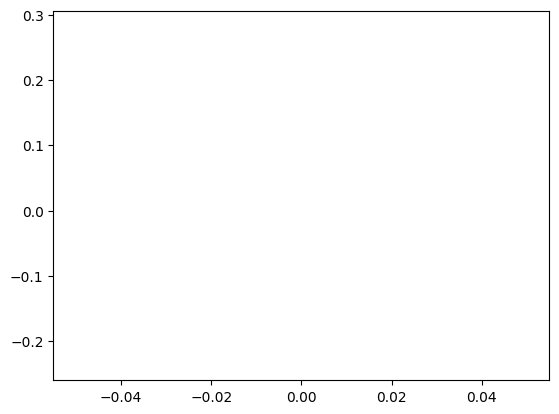

In [33]:
%matplotlib inline
plt.plot(ops_weight_base)

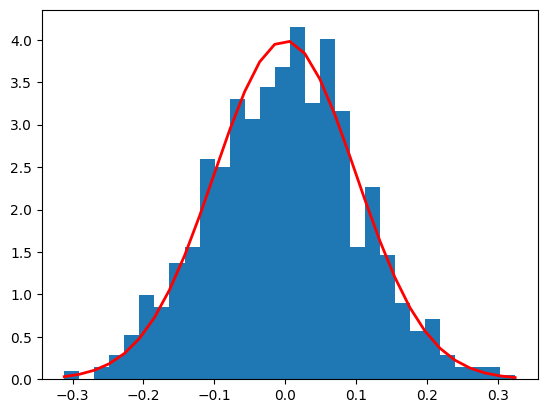

In [38]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)

np.random.normal()
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

-0.0011296010031605404


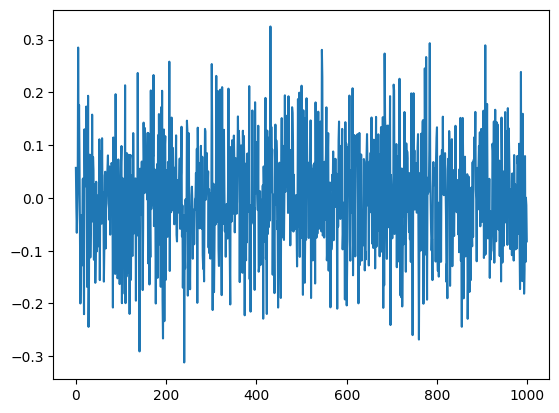

In [44]:
plt.plot(s)
print(np.mean(s))
plt.show()

In [6]:
def gaussian(x, mu=0., sig=1.):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

constraint_shape = np.ones(144) - gaussian(np.linspace(-2, 2, 144)) - 0.0
print(constraint_shape)

[8.64664717e-01 8.56933706e-01 8.48879350e-01 8.40496400e-01
 8.31780104e-01 8.22726253e-01 8.13331224e-01 8.03592019e-01
 7.93506316e-01 7.83072501e-01 7.72289720e-01 7.61157911e-01
 7.49677853e-01 7.37851194e-01 7.25680497e-01 7.13169269e-01
 7.00321996e-01 6.87144173e-01 6.73642332e-01 6.59824064e-01
 6.45698046e-01 6.31274052e-01 6.16562975e-01 6.01576830e-01
 5.86328769e-01 5.70833076e-01 5.55105167e-01 5.39161586e-01
 5.23019991e-01 5.06699137e-01 4.90218858e-01 4.73600038e-01
 4.56864579e-01 4.40035369e-01 4.23136236e-01 4.06191903e-01
 3.89227936e-01 3.72270691e-01 3.55347247e-01 3.38485344e-01
 3.21713315e-01 3.05060006e-01 2.88554701e-01 2.72227042e-01
 2.56106938e-01 2.40224482e-01 2.24609858e-01 2.09293247e-01
 1.94304730e-01 1.79674195e-01 1.65431237e-01 1.51605058e-01
 1.38224369e-01 1.25317292e-01 1.12911263e-01 1.01032931e-01
 8.97080677e-02 7.89614721e-02 6.88168807e-02 5.92968802e-02
 5.04228240e-02 4.22147523e-02 3.46913170e-02 2.78697105e-02
 2.17656012e-02 1.639307

In [7]:
constraint_shape = constraint_shape * (constraint_shape > 0)
print(constraint_shape)

[8.64664717e-01 8.56933706e-01 8.48879350e-01 8.40496400e-01
 8.31780104e-01 8.22726253e-01 8.13331224e-01 8.03592019e-01
 7.93506316e-01 7.83072501e-01 7.72289720e-01 7.61157911e-01
 7.49677853e-01 7.37851194e-01 7.25680497e-01 7.13169269e-01
 7.00321996e-01 6.87144173e-01 6.73642332e-01 6.59824064e-01
 6.45698046e-01 6.31274052e-01 6.16562975e-01 6.01576830e-01
 5.86328769e-01 5.70833076e-01 5.55105167e-01 5.39161586e-01
 5.23019991e-01 5.06699137e-01 4.90218858e-01 4.73600038e-01
 4.56864579e-01 4.40035369e-01 4.23136236e-01 4.06191903e-01
 3.89227936e-01 3.72270691e-01 3.55347247e-01 3.38485344e-01
 3.21713315e-01 3.05060006e-01 2.88554701e-01 2.72227042e-01
 2.56106938e-01 2.40224482e-01 2.24609858e-01 2.09293247e-01
 1.94304730e-01 1.79674195e-01 1.65431237e-01 1.51605058e-01
 1.38224369e-01 1.25317292e-01 1.12911263e-01 1.01032931e-01
 8.97080677e-02 7.89614721e-02 6.88168807e-02 5.92968802e-02
 5.04228240e-02 4.22147523e-02 3.46913170e-02 2.78697105e-02
 2.17656012e-02 1.639307

In [8]:
constraint_shape = constraint_shape + 0.01 * np.ones(144)
print(constraint_shape)

[0.87466472 0.86693371 0.85887935 0.8504964  0.8417801  0.83272625
 0.82333122 0.81359202 0.80350632 0.7930725  0.78228972 0.77115791
 0.75967785 0.74785119 0.7356805  0.72316927 0.710322   0.69714417
 0.68364233 0.66982406 0.65569805 0.64127405 0.62656297 0.61157683
 0.59632877 0.58083308 0.56510517 0.54916159 0.53301999 0.51669914
 0.50021886 0.48360004 0.46686458 0.45003537 0.43313624 0.4161919
 0.39922794 0.38227069 0.36534725 0.34848534 0.33171332 0.31506001
 0.2985547  0.28222704 0.26610694 0.25022448 0.23460986 0.21929325
 0.20430473 0.1896742  0.17543124 0.16160506 0.14822437 0.13531729
 0.12291126 0.11103293 0.09970807 0.08896147 0.07881688 0.06929688
 0.06042282 0.05221475 0.04469132 0.03786971 0.0317656  0.02639307
 0.02176457 0.01789085 0.01478095 0.01244212 0.01087985 0.0100978
 0.0100978  0.01087985 0.01244212 0.01478095 0.01789085 0.02176457
 0.02639307 0.0317656  0.03786971 0.04469132 0.05221475 0.06042282
 0.06929688 0.07881688 0.08896147 0.09970807 0.11103293 0.122911

In [36]:
import tensorflow as tf

H0_weight = tf.Variable(tf.ones([144]), trainable=False)
weights_unpacked = [H0_weight]
ops_weight_base = tf.Variable(tf.constant(ops_weight_base, dtype=tf.float32), dtype=tf.float32, name="weight_base")
ops_weight = tf.sin(ops_weight_base, name="weights")
for ii in range(ops_len):
    weights_unpacked.append(ops_max_amp[ii] * ops_weight[ii,:])

print(weights_unpacked)

[<tf.Variable 'Variable:0' shape=(144,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>, <tf.Tensor: shape=(144,), dtype=float32, numpy=
array([-5.46665378e-02, -3.45842652e-02, -3.64021063e-02, -1.06533185e-01,
        3.02615836e-02,  3.28485183e-02, -3.68888327e-03,  5.03701679e-02,
       -4.70415987e-02, -3.34194042e-02, -3.28342733e-03, -2.40747090e-02,
        